### Imports

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.covariance import EmpiricalCovariance
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

### Globals

In [15]:
data_filepath = '../../data/original/'
density_report_filepath = data_filepath + 'DensityReports.xlsx'
historical_incidents_filepath = data_filepath + 'HistoricalIncidents.xlsx'
product_attributes_filepath = data_filepath + 'ProductAttributes.xlsx'
supplier_scorecard_filepath = data_filepath + 'SupplierScorecard.xlsx'

### Load Data

In [16]:
supplier_scorecard = pd.read_excel(supplier_scorecard_filepath)

## Initial Inspection

In [17]:
supplier_scorecard.head()


,SupplierName,Month,PackagesHandled,BadPackagingRate (%),TotalIncidents,AverageCostPerIncident (€),OnTimeDeliveryRate (%),AnomaliesDetected
0,SupplierA,2023-01,7841,8.46,133,538.23,86.01,23
1,SupplierA,2023-02,7196,7.78,153,572.14,88.09,16
2,SupplierA,2023-03,7842,7.94,163,547.51,84.74,21
3,SupplierA,2023-04,7587,7.70,158,588.33,91.58,18
4,SupplierA,2023-05,8010,7.77,166,618.34,96.87,18


In [18]:
supplier_scorecard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SupplierName                252 non-null    object 
 1   Month                       252 non-null    object 
 2   PackagesHandled             252 non-null    int64  
 3   BadPackagingRate (%)        252 non-null    float64
 4   TotalIncidents              252 non-null    int64  
 5   AverageCostPerIncident (€)  252 non-null    float64
 6   OnTimeDeliveryRate (%)      252 non-null    float64
 7   AnomaliesDetected           252 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 15.9+ KB


In [19]:
supplier_scorecard['Month'] = pd.to_datetime(supplier_scorecard['Month'])

In [20]:
supplier_scorecard.describe(include='all')

,SupplierName,Month,PackagesHandled,BadPackagingRate (%),TotalIncidents,AverageCostPerIncident (€),OnTimeDeliveryRate (%),AnomaliesDetected
count,252,252,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
unique,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,SupplierA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2023-09-15 22:40:00,1984.126984,23.047540,70.436508,552.654524,75.397857,11.698413
min,NaN,2023-01-01 00:00:00,66.000000,7.290000,0.000000,0.000000,60.000000,0.000000
25%,NaN,2023-05-01 00:00:00,95.000000,16.652500,3.000000,483.457500,68.837500,1.000000
50%,NaN,2023-09-16 00:00:00,1097.000000,21.000000,46.000000,544.090000,76.395000,8.500000
75%,NaN,2024-02-01 00:00:00,2963.750000,27.510000,149.250000,611.607500,81.950000,20.250000
max,NaN,2024-06-01 00:00:00,8019.000000,45.850000,210.000000,1969.000000,96.870000,43.000000


In [21]:
supplier_scorecard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   SupplierName                252 non-null    object        
 1   Month                       252 non-null    datetime64[ns]
 2   PackagesHandled             252 non-null    int64         
 3   BadPackagingRate (%)        252 non-null    float64       
 4   TotalIncidents              252 non-null    int64         
 5   AverageCostPerIncident (€)  252 non-null    float64       
 6   OnTimeDeliveryRate (%)      252 non-null    float64       
 7   AnomaliesDetected           252 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 15.9+ KB


In [22]:
supplier_scorecard.dtypes

SupplierName                          object
Month                         datetime64[ns]
PackagesHandled                        int64
BadPackagingRate (%)                 float64
TotalIncidents                         int64
AverageCostPerIncident (€)           float64
OnTimeDeliveryRate (%)               float64
AnomaliesDetected                      int64
dtype: object

In [23]:
supplier_scorecard.isnull().sum()

SupplierName                  0
Month                         0
PackagesHandled               0
BadPackagingRate (%)          0
TotalIncidents                0
AverageCostPerIncident (€)    0
OnTimeDeliveryRate (%)        0
AnomaliesDetected             0
dtype: int64

In [24]:
supplier_scorecard.duplicated().sum()


0

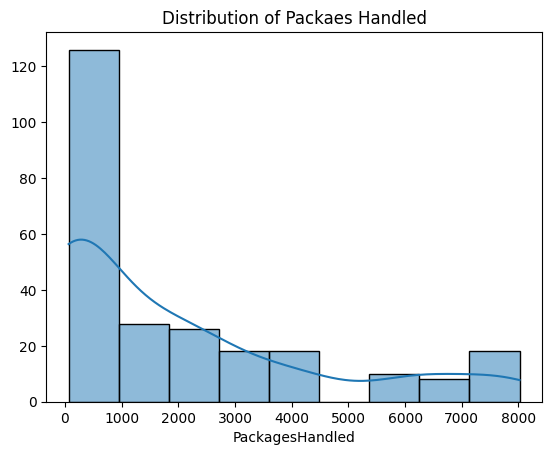

In [25]:
sns.histplot(supplier_scorecard['PackagesHandled'], kde=True)
plt.title('Distribution of Packaes Handled')
plt.ylabel(None)
plt.show()

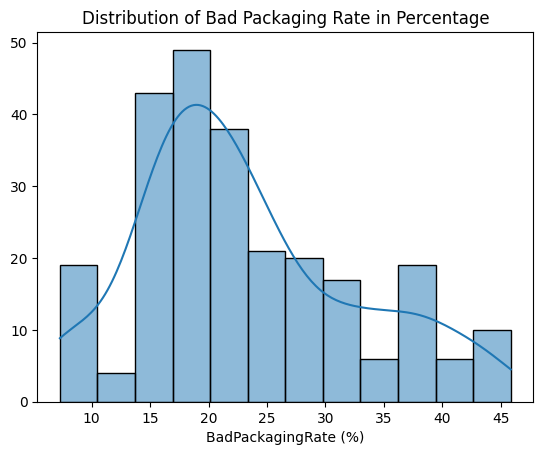

In [26]:
sns.histplot(supplier_scorecard['BadPackagingRate (%)'], kde=True)
plt.title('Distribution of Bad Packaging Rate in Percentage')
plt.ylabel(None)
plt.show()

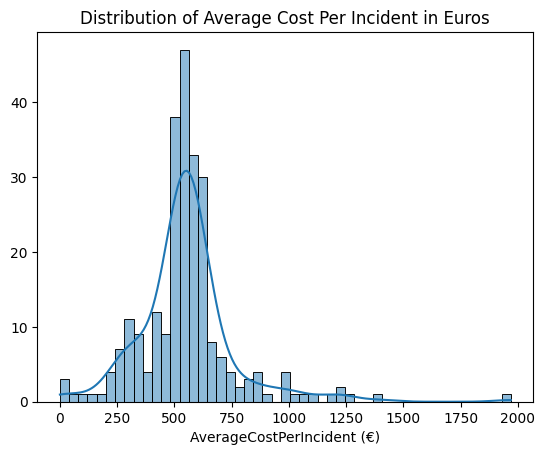

In [27]:
sns.histplot(supplier_scorecard['AverageCostPerIncident (€)'], kde=True)
plt.title('Distribution of Average Cost Per Incident in Euros')
plt.ylabel(None)
plt.show()

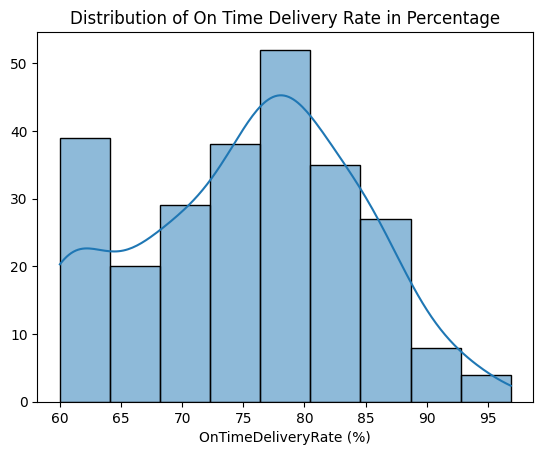

In [28]:
sns.histplot(supplier_scorecard['OnTimeDeliveryRate (%)'], kde=True)
plt.title('Distribution of On Time Delivery Rate in Percentage')
plt.ylabel(None)
plt.show()

In [29]:
# define correlation matrix for numerical columns
numerical_columns = supplier_scorecard.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = supplier_scorecard[numerical_columns].corr()

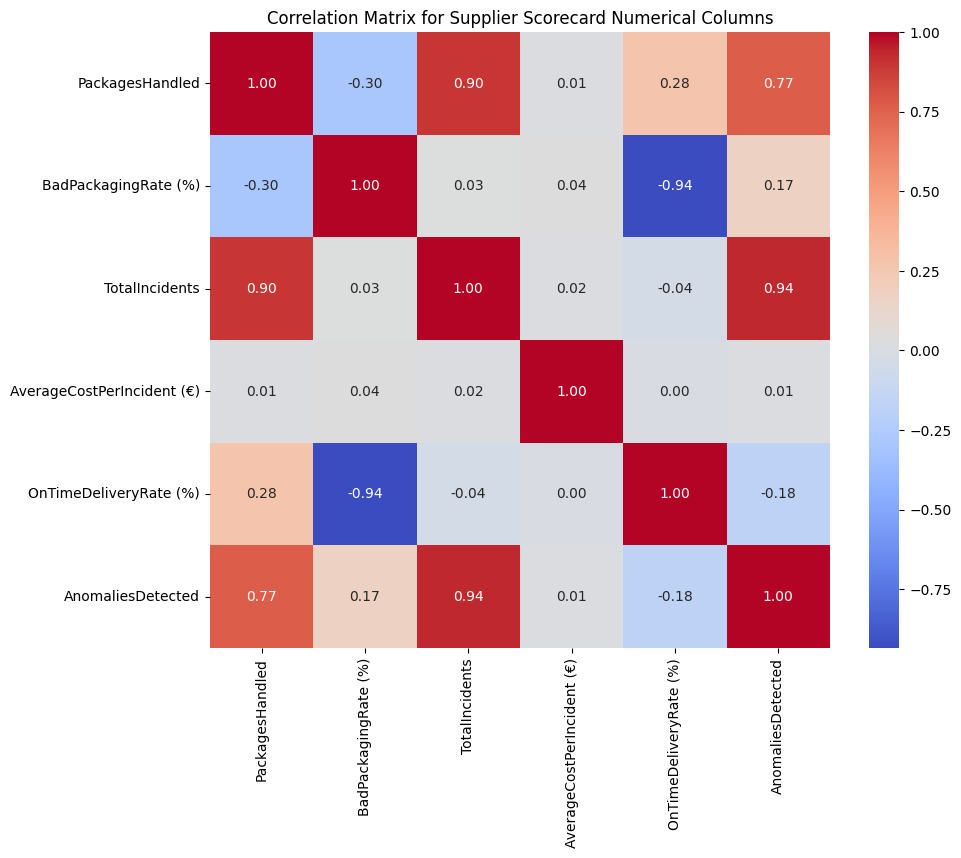

In [30]:
# plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Supplier Scorecard Numerical Columns')
plt.show()

In [31]:
def visualize_boxplots(df: pd.DataFrame, col: object):
    """
    Display boxplots for the specified numeric columns.
    """
    df[[col]].boxplot()
    plt.title(f"Boxplot of {col} Feature")
    plt.xlabel("Feature")
    plt.ylabel("Value")
    plt.show()

In [33]:
def get_outlier_percentage(X, feature):
    iso = IsolationForest(contamination=0.01, random_state=42)
    # IsolationForest expects 2D input
    preds = iso.fit_predict(X[[feature]])
    # Outliers are labeled as -1
    outlier_count = (preds == -1).sum()
    percentage = 100 * outlier_count / len(X)
    return percentage

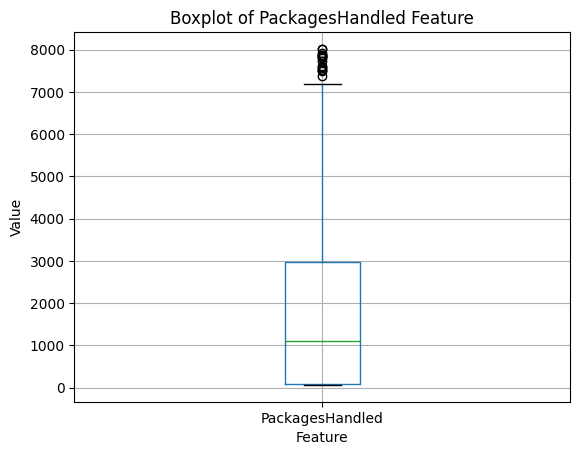

PackagesHandled outlier percentage: 1.19%


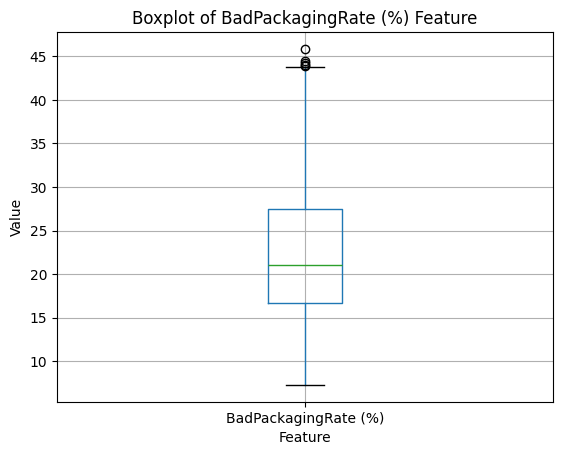

BadPackagingRate (%) outlier percentage: 1.19%


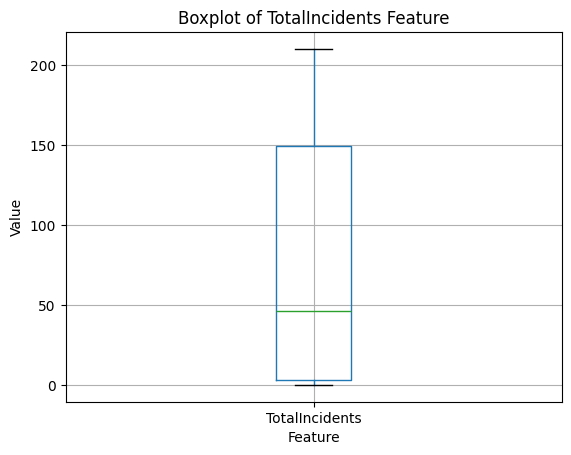

TotalIncidents outlier percentage: 1.19%


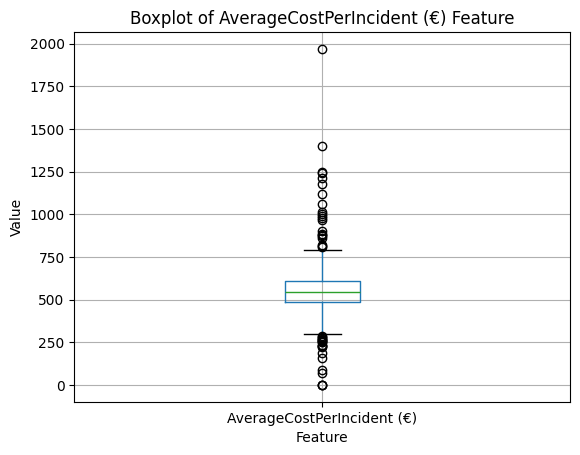

AverageCostPerIncident (€) outlier percentage: 0.79%


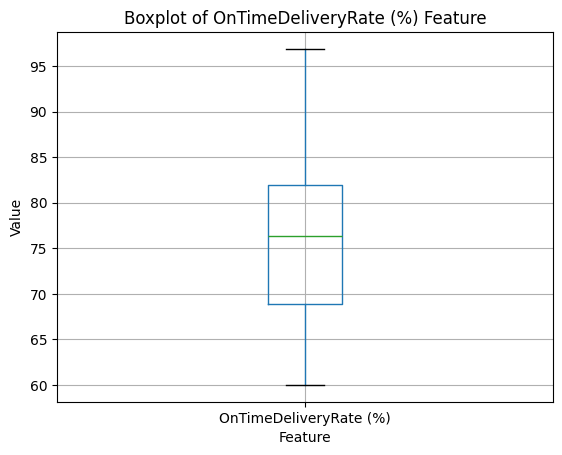

OnTimeDeliveryRate (%) outlier percentage: 1.19%


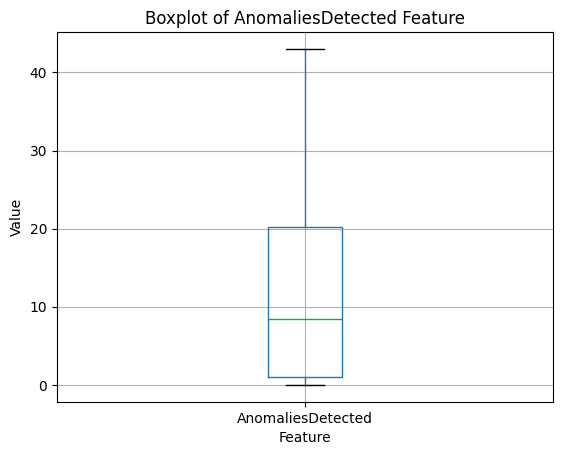

AnomaliesDetected outlier percentage: 0.79%


In [35]:
for col in numerical_columns:
    visualize_boxplots(supplier_scorecard, col)
    print(f"{col} outlier percentage: {get_outlier_percentage(supplier_scorecard[numerical_columns], col):.2f}%")